## The Julia language has been widely used in the study of dynamic systems. Below is the structure of the “RigorousInvariantMeasures.jl” package that can be run in VScode with the Julia extension.

In [ ]:
import Pkg;
Pkg.add(path = "https://github.com/JuliaDynamics/RigorousInvariantMeasures.jl")

In [1]:
using RigorousInvariantMeasures
using Plots
using IntervalArithmetic
using LaTeXStrings
using Pkg
using StatsPlots
using TaylorModels
using LinearAlgebra

#### Firts we input the dinamic and tolerance.

$$
4*x + 0.5*x*(1 − x)
$$
and $\tau = 0.035$ and consider $\phi = x^2$.

In [2]:
D = mod1_dynamic(x->4*x + 0.5*x*(1 − x))

Piecewise-defined dynamic with 4 branches

In [3]:
τ = 0.035#Then we'll reduce this tolerance

0.035

#### Next, we declare the Ulam basis, in order to perform the Ulam's approximation in our discretizations.

In [4]:
B = Ulam(5000)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 5001))

To compute the diffusion coefficient rigorously we have to compute rigorously the projection
of an observable on the Ulam basis, i.e., given an observable $\phi \in BV$ , and the projection $\Pi_{\delta}$
we need to compute rigorously the coefficients $\{v_0 , . . . , v_n \}$ such that

$$
\Pi_{\delta}\phi = \sum_{i=0}^{n-1} v_i \cdot \frac{\chi_i}{m(I_i)}
$$

Remember, in this case we put $\phi(x) = x^2$.

In [5]:
ϕ = RigorousInvariantMeasures.Observable(B, x-> x^2)#Thi part is discretization of observable

Observable(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 5001)), Interval{Float64}[[1.33333e-08, 1.33334e-08], [9.33333e-08, 9.33334e-08], [2.53333e-07, 2.53334e-07], [4.93333e-07, 4.93334e-07], [8.13333e-07, 8.13334e-07], [1.21333e-06, 1.21334e-06], [1.69333e-06, 1.69334e-06], [2.25333e-06, 2.25334e-06], [2.89333e-06, 2.89334e-06], [3.61333e-06, 3.61334e-06]  …  [0.996203, 0.996204], [0.996602, 0.996603], [0.997002, 0.997003], [0.997401, 0.997402], [0.997801, 0.997802], [0.9982, 0.998201], [0.9986, 0.998601], [0.999, 0.999001], [0.9994, 0.999401], [0.9998, 0.999801]], [0.999468, 1])

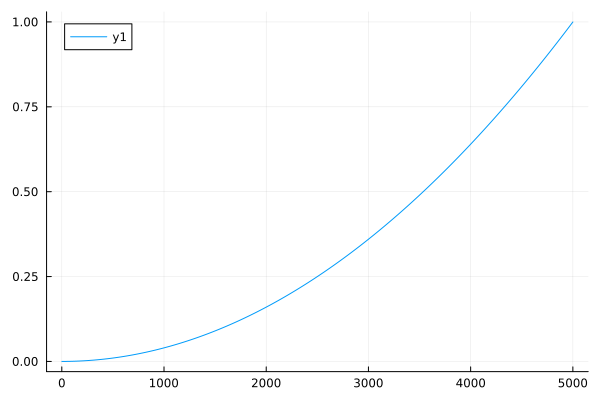

In [6]:
plot(mid.(ϕ.v))

In [7]:
mid.(ϕ.v)#We need of v_i

5000-element Vector{Float64}:
 1.333333333333329e-8
 9.333333333333417e-8
 2.533333333333306e-7
 4.933333333333338e-7
 8.133333333333445e-7
 1.2133333333333524e-6
 1.6933333333333406e-6
 2.2533333333333335e-6
 2.893333333333307e-6
 3.6133333333332815e-6
 ⋮
 0.9966028933332612
 0.997002253334369
 0.9974016933332612
 0.9978012133332615
 0.9982008133332623
 0.9986004933332608
 0.9990002533343717
 0.9994000933332616
 0.999800013333263

#### The first operation is the integral with respect to Lebesgue measure of an observable projected on the Ulam basis.

- Remember that
$$
\mu_{\delta} := \int_I \psi h_{\delta}\,dm,
$$
so let's calculate $h_{\delta}$. And next caculate 
$$
\hat{\psi}_{\delta} := \psi - \mu_{\delta}.
$$

In [8]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/Downloads/RigorousInvariantMeasures.jl-main/src/GenericAssembler.jl:145


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 5, 6, 7, 8, 9  …  4993, 4993, 4994, 4995, 4996, 4997, 4997, 4998, 4999, 5000], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  4998, 4999, 4999, 4999, 4999, 4999, 5000, 5000, 5000, 5000], Interval{Float64}[[0.222223, 0.222224], [0.222225, 0.222226], [0.222227, 0.222228], [0.222229, 0.22223], [0.111093, 0.111094], [0.111138, 0.111139], [0.222234, 0.222235], [0.222236, 0.222237], [0.222238, 0.222239], [0.222151, 0.222152]  …  [0.285565, 0.285566], [0.000114272, 0.000114273], [0.285683, 0.285684], [0.285688, 0.285689], [0.285693, 0.285694], [0.142819, 0.14282], [0.142878, 0.142879], [0.285702, 0.285703], [0.285707, 0.285708], [0.285711, 0.285712]], 5000, 5000))

#### We can plot the dynamics graph and show the coefficients of the Lasota-Yorke inequality.

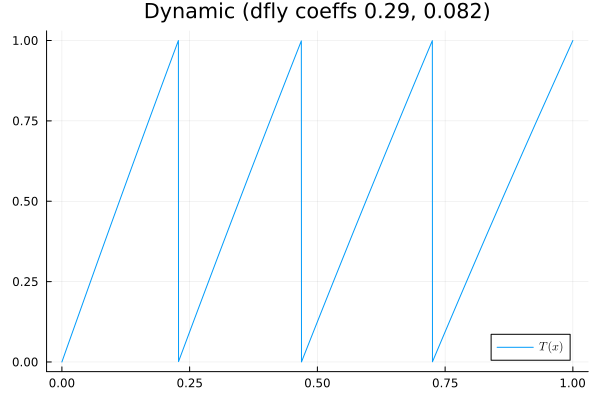

In [9]:
A, BB = dfly(strong_norm(B), aux_norm(B), D)
plot(D, title="Dynamic (dfly coeffs $(round(A, sigdigits=2)), $(round(BB, sigdigits=2)))", label=L"T(x)", legend=:bottomright)

#### Next, we see that our discretized system has a moment that mixes sufficiently for our study.

In [10]:
norms = powernormbounds(B, D; Q = Q)

Computing norms of powers... 100%|███████████████████████| Time: 0:00:02


64-element Vector{Float64}:
 1.0000000001174065
 1.0000000002348133
 1.00000000035222
 1.0000000004696268
 1.0000000005870335
 1.0000000007044403
 0.23976321644142623
 0.06484263235951446
 0.06484263236712741
 0.06484263237474036
 ⋮
 4.819749427796858e-9
 4.819749428362728e-9
 4.819749428928598e-9
 4.819749429494468e-9
 4.819749430060338e-9
 4.819749430626208e-9
 4.272961063164595e-9
 1.1555986252502982e-9
 3.125252402116119e-10

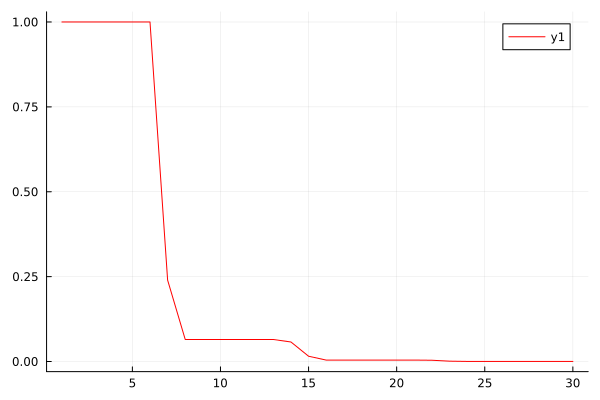

In [11]:
plot(1:30,norms[1:30], color = :red)#In thi case for N>15 we have minxing enough

## And then we get our $h_{\delta}$.

In [12]:
h_delta = invariant_vector(B, Q)#We need w_i

5000-element Vector{Float64}:
 0.9588703461835143
 0.9588819444471289
 0.9588982428116306
 0.958912895739972
 0.9589286024319316
 0.9589427660260634
 0.9589621539582341
 0.9589762559402066
 0.9589892499303624
 0.9590074331821793
 ⋮
 1.0439331371969711
 1.0439490976591796
 1.0439686554767202
 1.0439859704307561
 1.044005798932436
 1.0440254468703178
 1.0440423567825117
 1.0440611102378674
 1.0440800489395512

#### In our rigorous approach, we can also show error control explicitly. And plot $h_{\delta}$.

In [13]:
error = distance_from_invariant(B, D, Q, h_delta, norms)

0.0003535497698170294

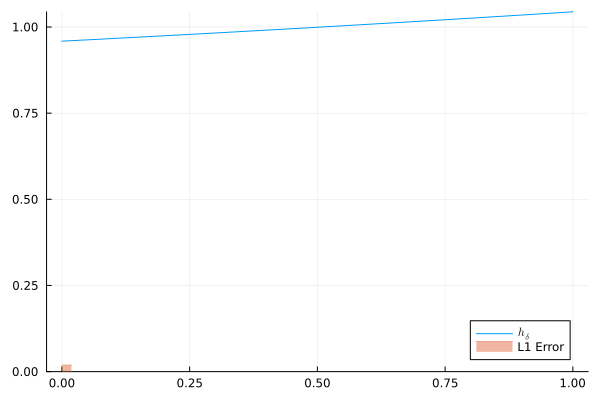

In [14]:
plot(B, h_delta, label=L"h_{\delta}")
plot!(B, error)

#### Next we have $\mu_{\delta}$.

In [15]:
mu_delta = integrateobservable(B, ϕ, h_delta, error)

[0.340123, 0.340831]

#### And also calculate $\hat{\psi}_{\delta}$.

In [16]:
psi_delta_hat = RigorousInvariantMeasures.Observable(B, x-> (x^2-mu_delta)^2)

Observable(Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 5001)), Interval{Float64}[[0.115683, 0.116166], [0.115683, 0.116166], [0.115683, 0.116166], [0.115683, 0.116165], [0.115683, 0.116165], [0.115682, 0.116165], [0.115682, 0.116165], [0.115682, 0.116164], [0.115681, 0.116164], [0.115681, 0.116163]  …  [0.429514, 0.430442], [0.430037, 0.430966], [0.430561, 0.431491], [0.431085, 0.432016], [0.43161, 0.432541], [0.432135, 0.433067], [0.432661, 0.433593], [0.433187, 0.434119], [0.433714, 0.434647], [0.434241, 0.435174]], [0.433803, 0.435438])

#### In this part we have
$$
\int_I  \hat{\psi}_{\delta} \cdot h_{\delta}\,dm
$$

In [17]:
int_psi_delta_hat = integrateobservable(B, psi_delta_hat, h_delta, error)#\sum_i \frac{v_i \cdot w_i}{m(I_i)}

[0.0894992, 0.0901729]

In [18]:
weak_norms, strong_norms = convergencerateabstract(B, D, norms)

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.02292119625342325, 0.008656946180141055, 0.008656946180141055, 0.008656946180141055  …  9.647739863240212e-15, 3.643787341317247e-15, 3.643787341317247e-15, 3.643787341317247e-15, 3.643787341317247e-15, 1.5502723054058494e-15, 5.855114961749557e-16, 2.2113773880730361e-16, 8.351996475607194e-17, 3.1544070905662675e-17], [0.3673469387755103, 0.1349437734277385, 0.04957118207549579, 0.018209821986916824, 0.006689322362540876, 0.002457302092361955, 0.0009026824012758204, 0.0003315976167951994, 0.00012181136943497124, 4.474703366998944e-5  …  1.2000611574796777e-24, 4.408387925435551e-25, 1.6194078093436725e-25, 5.948845013915532e-26, 2.1852900051118286e-26, 8.027595937145495e-27, 2.9489127932371214e-27, 1.0832740873115958e-27, 3.979374198287496e-28, 1.461810929983162e-28])

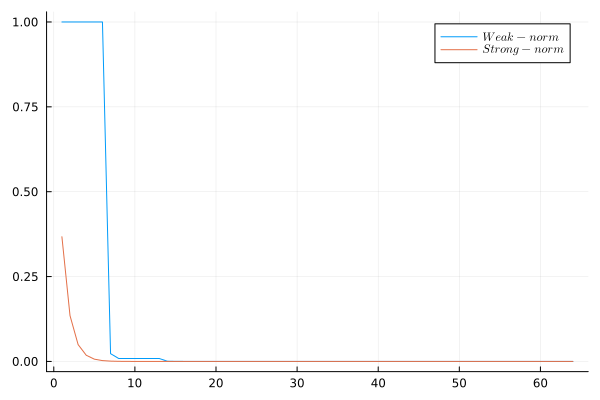

In [ ]:
plot(weak_norms, label=L"Weak-norm")
plot!(strong_norms, label=L"Strong-norm")#It shows how norm contractions occur.